# Part 1 - Exploratory Data Analysis and Baseline Model

In [2]:
#1. Import Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [3]:
#2. Create two dataframes for the training and testing data.

dfTest = pd.read_csv("genes_test.csv")
dfTrain = pd.read_csv("genes_train.csv")

In [4]:
dfTrain.head()

,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,GB DEF = Calcium/calmodulin-dependent protein kinase II delta E mRNA; partial cds,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypeptide 1,PTGER3 Prostaglandin E receptor 3 (subtype EP3) {alternative products}.2,HMG2 High-mobility group (nonhistone chromosomal) protein 2.1,RB1 Retinoblastoma 1 (including osteosarcoma).1,GB DEF = Glycophorin Sta (type A) exons 3 and 4; partial,GB DEF = mRNA (clone 1A7),patient,cancer type
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,-125,389,-37,793,329,36,191,-37,1,ALL
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,-36,442,-17,782,295,11,76,-14,2,ALL
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,33,168,52,1138,777,41,228,-41,3,ALL
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,218,174,-110,627,170,-50,126,-91,4,ALL
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,57,504,-26,250,314,14,56,-25,5,ALL


In [5]:
dfTest.head()

,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,GB DEF = Calcium/calmodulin-dependent protein kinase II delta E mRNA; partial cds,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypeptide 1,PTGER3 Prostaglandin E receptor 3 (subtype EP3) {alternative products}.2,HMG2 High-mobility group (nonhistone chromosomal) protein 2.1,RB1 Retinoblastoma 1 (including osteosarcoma).1,GB DEF = Glycophorin Sta (type A) exons 3 and 4; partial,GB DEF = mRNA (clone 1A7),patient,cancer type
0,-62,-23,-7,142,-233,-284,-167,-97,-12,-70,...,46,104,15,245,164,84,100,-18,41,ALL
1,22,-153,17,276,-211,-250,55,-141,0,500,...,16,558,24,893,297,6,1971,-42,42,ALL
2,86,-36,-141,252,-201,-384,-420,-197,-60,-468,...,-84,615,-52,1235,9,7,1545,-81,43,ALL
3,-146,-74,170,174,-32,-318,8,-152,-148,17,...,-142,249,-220,354,-42,-100,45,-108,44,ALL
4,-187,-187,312,142,114,-148,-184,-133,12,97,...,-185,13,-148,304,-1,-207,112,-190,45,ALL


In [6]:
#3. Shape of the training data

dfTrain.shape

# It looks a little unbalanced as there are only 40 measurements across 7131 features

(40, 7131)

In [7]:
#4. Number of patients with ALL and AML in the training data

# dfTrain.groupby("patient")["cancer type"].value_counts()
dfTrain["cancer type"].value_counts()

# This feature can be considered unbalanced as ALL has twice as many data points than AML.

ALL    29
AML    11
Name: cancer type, dtype: int64

In [8]:
#5. 
dfTrain.max(axis=1)

C:\Users\Usama\AppData\Local\Temp\ipykernel_15628\1984984003.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfTrain.max(axis=1)


0     31086
1     29288
2     28056
3     31449
4     29543
5     38467
6     41911
7     40065
8     23602
9     28033
10    25966
11    30546
12    30797
13    28519
14    30256
15    27268
16    28952
17    32645
18    33143
19    27358
20    33548
21    39558
22    36417
23    27983
24    32785
25    31614
26    31261
27    29833
28    30354
29    25055
30    28350
31    25093
32    32946
33    28698
34    61228
35    37164
36    32204
37    29169
38    45815
39    29136
dtype: int64

In [9]:
dfTrain.min(axis=1)

C:\Users\Usama\AppData\Local\Temp\ipykernel_15628\3131725800.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfTrain.min(axis=1)


0    -19826
1    -17930
2    -27182
3    -23396
4    -10339
5    -21658
6    -24024
7    -27570
8    -25171
9    -12500
10   -17480
11   -15256
12   -12854
13   -14937
14   -13380
15   -10492
16   -19523
17    -8692
18   -11572
19   -13838
20    -7397
21   -17179
22   -14937
23   -17368
24   -17377
25   -10652
26   -20406
27   -20376
28    -9501
29   -17580
30   -25491
31   -28400
32   -27811
33   -17310
34   -16281
35   -27398
36   -23673
37   -23645
38   -21984
39   -21296
dtype: int64

In [10]:
dfTrain.mean(axis=1)

C:\Users\Usama\AppData\Local\Temp\ipykernel_15628\2242959023.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfTrain.mean(axis=1)


0     641.277279
1     690.149790
2     698.210379
3     600.901543
4     679.438289
5     564.719355
6     584.356662
7     571.280084
8     789.604208
9     599.400421
10    632.166760
11    492.532819
12    674.563815
13    648.522581
14    705.682188
15    624.492847
16    791.292987
17    557.489902
18    558.555820
19    954.292006
20    577.572230
21    524.687798
22    532.180926
23    662.077279
24    597.783450
25    603.232398
26    501.277279
27    673.188920
28    556.389201
29    718.837868
30    598.569285
31    676.830435
32    723.466620
33    618.776578
34    514.429453
35    775.039832
36    689.156662
37    626.803366
38    582.118794
39    527.750912
dtype: float64

In [11]:
# The max, min, and mean are all far apart given for all patients, so we will need to scale them. 
# It is a problem as the data points in the dataframe wlll be unbalanced and a wide variance will occur.

In [12]:
#6.
x_train = dfTrain.drop(["cancer type", "patient"], axis = 1)
y_train = dfTrain["cancer type"]
x_test = dfTest.drop(["cancer type", "patient"], axis = 1) 
y_test = dfTest["cancer type"]

# The two columns being dropped are "cancer type" and patient as "cancer type" will be predicted and "patient"'s data is just increasing by one, so it will not have any significant power when predicting.

In [13]:
#7a. Scale x_train and x_test separately 

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [14]:
#7b.Build a Logistics Model
model = LogisticRegression()

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

print(model.score(x_train_scaled, y_train))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

1.0
Accuracy:  0.8125
[[18  0]
 [ 6  8]]


In [15]:
#7c. Gaussian Naive Bayes
model = GaussianNB()

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

print(model.score(x_train_scaled, y_train))
print("Accuarcy: ", metrics.accuracy_score(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

1.0
Accuarcy:  0.90625
[[16  2]
 [ 1 13]]


In [16]:
#7d. Low scores?

# The scores are lower due to model being incorrectly fitted without taking the variance, mean, and standard deviation of all patients into account.
# The condusion matrix shows us that there are 6 false negatives with the logistics model and the gaussian bayes model has an additional 2 false negatives.
# The accuracy between the two models differ, but since the gaussian model is higher, it can be assumed the confusion matrix is more reliable.

In [17]:
#8a. Scale Train by hand

x_train_scaled = ((x_train - x_train.mean()) / x_train.std())

In [18]:
#8b. Scale Test by hand

x_test_scaled = ((x_test - x_test.mean()) / x_test.std())

In [19]:
#8c. Build the Logoistic and Gaussian model again

In [20]:
model = LogisticRegression()

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

print(model.score(x_train_scaled, y_train))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

1.0
Accuracy:  0.75
[[18  0]
 [ 8  6]]


In [21]:
model = GaussianNB()

model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

print(model.score(x_train_scaled, y_train))
print("Accuarcy: ", metrics.accuracy_score(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

1.0
Accuarcy:  0.78125
[[18  0]
 [ 7  7]]


In [22]:
# The performance did not improve across for both models. 
# Accuracy went down for both models which affected the confusion matrix as well.
# The model score remained the same. 
# This did not improve performance as there may have been too much of a difference between the max and minimum values for each patient leading to an inaccurate model.

# Part 2 - Feature Reduction Using Principal Component Analysis

In [23]:
#1a. 
from sklearn.decomposition import PCA

pca = PCA(n_components = 15).fit(x_train_scaled)

In [24]:
#1b.
pca.explained_variance_ratio_.cumsum()

array([0.14160178, 0.25887229, 0.32470763, 0.37114101, 0.41593427,
       0.45376638, 0.49028049, 0.52255107, 0.55258915, 0.57866176,
       0.60321984, 0.62575867, 0.64747698, 0.66831497, 0.68807831])

In [26]:
pca = PCA(n_components = 25).fit(x_train_scaled)
pca.explained_variance_ratio_.cumsum()

array([0.14160178, 0.25887229, 0.32470765, 0.37114267, 0.41593648,
       0.45377102, 0.49028881, 0.52256425, 0.55262392, 0.57871405,
       0.60330591, 0.6260086 , 0.64798126, 0.66890239, 0.68890652,
       0.70782766, 0.72573446, 0.742954  , 0.75982449, 0.77565151,
       0.79116714, 0.80607457, 0.82029185, 0.83427815, 0.84786093])

In [27]:
pca = PCA(n_components = 35).fit(x_train_scaled)
pca.explained_variance_ratio_.cumsum()

array([0.14160178, 0.25887229, 0.32470765, 0.37114269, 0.41593652,
       0.45377108, 0.49028899, 0.52256446, 0.55262452, 0.57871474,
       0.60331123, 0.62601503, 0.64798886, 0.66892235, 0.68894065,
       0.70786795, 0.72580368, 0.74303738, 0.75991715, 0.77579443,
       0.79135625, 0.80636007, 0.82059574, 0.83464022, 0.84827473,
       0.86159723, 0.87466785, 0.88744908, 0.89998391, 0.91215863,
       0.92427847, 0.93560532, 0.94637448, 0.9567996 , 0.9663936 ])

In [30]:
pca = PCA(n_components = 30).fit(x_train_scaled)
pca.explained_variance_ratio_.cumsum()

array([0.14160178, 0.25887229, 0.32470765, 0.37114269, 0.41593652,
       0.45377108, 0.49028899, 0.52256446, 0.55262452, 0.57871474,
       0.60331123, 0.62601503, 0.64798886, 0.66892235, 0.68894065,
       0.70786795, 0.72580368, 0.74303738, 0.75991715, 0.77579443,
       0.79135625, 0.80636007, 0.82059574, 0.83464022, 0.84827473,
       0.86159723, 0.87466785, 0.88744908, 0.89998391, 0.91215863])

In [ ]:
# The prinicipal components should be set to 30 in order to obtain a variance of 90%.

In [31]:
#2.
x_train_scaledPCA = pca.transform(x_train_scaled)
x_test_scaledPCA = pca.transform(x_test_scaled)

In [35]:
#3.
model = LogisticRegression()

model.fit(x_train_scaledPCA, y_train)

y_pred = model.predict(x_test_scaledPCA)

print(model.score(x_train_scaledPCA, y_train))
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

1.0
Accuracy:  0.75
[[18  0]
 [ 8  6]]


In [34]:
model = GaussianNB()

model.fit(x_train_scaledPCA, y_train)

y_pred = model.predict(x_test_scaledPCA)

print(model.score(x_train_scaledPCA, y_train))
print("Accuarcy: ", metrics.accuracy_score(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

0.975
Accuarcy:  0.625
[[18  0]
 [12  2]]


In [ ]:
# Even with the PCA fitting and cutting the features, our model has still seen a major decrease in accuracy and predictions. 
# The model score has also decreased indicating that PCA is not a viable option for predicing.
# Due to number of features being cut out, it may have something to do with our model's prediction power decreasing.

# Part 3 - Class Balancing

In [36]:
!pip3 install imblearn

     ------------------------------------ 226.0/226.0 kB 811.1 kB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 708.7 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [51]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

x_train = dfTrain.drop(["cancer type", "patient"], axis = 1)
y_train = dfTrain["cancer type"]
x_test = dfTest.drop(["cancer type", "patient"], axis = 1) 
y_test = dfTest["cancer type"]

x_train_scaled = ((x_train - x_train.mean()) / x_train.std())
x_test_scaled = ((x_test - x_test.mean()) / x_test.std())

x_bal_train, y_bal_train = sm.fit_resample(x_train_scaled, y_train)
x_bal_test, y_bal_test = sm.fit_resample(x_test_scaled, y_test)

C:\Users\Usama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cancer type', ylabel='count'>

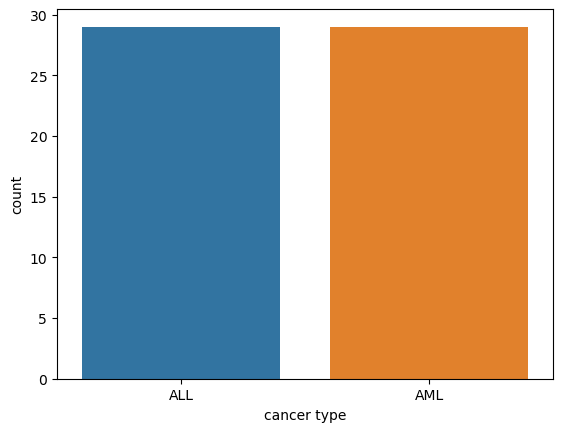

In [52]:
sns.countplot(y_bal_train)

C:\Users\Usama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cancer type', ylabel='count'>

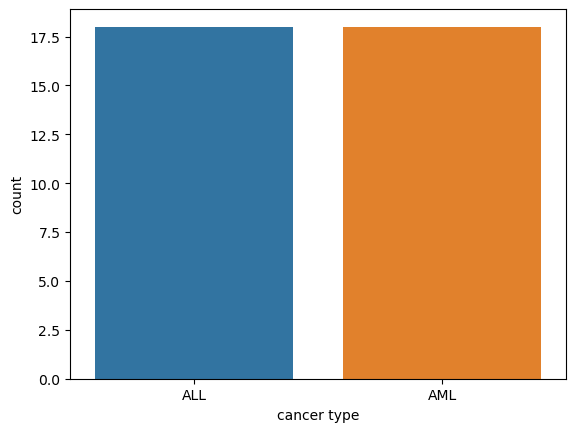

In [53]:
sns.countplot(y_bal_test)

In [56]:
model = LogisticRegression()

model.fit(x_bal_train, y_bal_train)

y_pred = model.predict(x_bal_test)

print(model.score(x_bal_train, y_bal_train))
print("Accuracy: ", metrics.accuracy_score(y_bal_test, y_pred))
cm = metrics.confusion_matrix(y_bal_test, y_pred)
print(cm)

1.0
Accuracy:  0.75
[[18  0]
 [ 9  9]]


In [57]:
model = GaussianNB()

model.fit(x_bal_train, y_bal_train)

y_pred = model.predict(x_bal_test)

print(model.score(x_bal_train, y_bal_train))
print("Accuracy: ", metrics.accuracy_score(y_bal_test, y_pred))
cm = metrics.confusion_matrix(y_bal_test, y_pred)
print(cm)

1.0
Accuracy:  0.75
[[18  0]
 [ 9  9]]


In [58]:
# These are slightly better than using PCA, but yield lower accuracies than our original standardScaling.
# I don't beieve this should be the case, as I may have done something wrong in terms of inputting the data.
# The Gaussian Naive Bayer with a balanced fit should yield the highest as the dataset should now be balanced for both features and data points as well. 
# The results of both models are the same, but it is inconclusive to determine that these may be our most accurate models due to user error.


# Part 4 - Summarizing

In [59]:
# If I were to build a new model, I would use a Gaussian Naive Bayer model since it has the highest accuracy even with standard scaling.
# The balanced fitting should be the best in theory, but the results of this lab showed that it was not the case.
# I would not use PCA as it yielded the least reliable results and lowest accuracies. 